# Assignment 4 - "Deep Learning Final Project" (15 p)
## Topic: Logistics Supply chain real world data
### Real-World Insights: Optimizing Logistics and Supply Chain Data

#### About Dataset

**Problem set** : This is a multi-label delivery delay prediction problem, which is a challenge often encountered by supply chain practitioners from various industries in their daily operations.

**Testing** : A tabular dataset that consists of a set of variables related to delivery will be provided to the participants to develop their delay prediction models.

**Evaluation Metric**: An ideal delay prediction algorithm shall be able to accurately predict delivery arrival status.

Dataset Source: https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data/data

## Assignment 4-1: Implementation Plan for Deep Learning and Selection of Dataset (3 points)

In [234]:
# Load all necessary libraries after excution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [235]:
# Define the file path
file_path = "logistics_data/incom2024_delay_example_dataset.csv"  # Update with actual filename

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [236]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [237]:
# Features to remove bassed on previous analysis
columns_to_remove = [
    "customer_id", "order_id", "order_customer_id", "order_item_cardprod_id", "order_item_id",
    "product_card_id", "product_category_id", "category_name", "department_name", "product_name",
    "customer_zipcode", "latitude", "longitude", "market", "order_city", "order_country",
    "customer_city", "customer_state", "customer_country", "order_state",
]

# Drop unncessary columns
df_cleaned = df.drop(columns=columns_to_remove, axis=1)

# Display after removing
df_cleaned.head()

,payment_type,profit_per_order,sales_per_customer,category_id,customer_segment,department_id,order_date,order_item_discount,order_item_discount_rate,order_item_product_price,...,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,order_region,order_status,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Consumer,3.0,2015-08-12 00:00:00+01:00,12.623338,0.13,99.99,...,1.0,99.99,84.99157,32.083145,Western Europe,COMPLETE,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Consumer,7.0,2017-02-10 00:00:00+00:00,16.500000,0.07,199.99,...,1.0,199.99,181.99000,91.235870,South America,PENDING,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Consumer,7.0,2015-01-01 00:00:00+00:00,6.600000,0.06,49.98,...,2.0,99.96,93.81015,6.965549,Western Europe,COMPLETE,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Consumer,4.0,2017-05-31 00:00:00+01:00,16.942171,0.16,59.99,...,2.0,119.98,99.89060,-95.401400,Central America,PROCESSING,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Consumer,7.0,2015-03-28 00:00:00+00:00,29.990000,0.15,199.99,...,1.0,199.99,171.07587,44.569000,Central America,COMPLETE,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


### The reason why removing lots of columns

- Before there are many columns, but now 20 columns was droped out. This means that all those 20 columns (features) is irrelevant, redundant, or have high cardinality without much predictive value.
- The main problem of dataset need to be solved is **delivery delay prediction**
- After refering the dataset, those 21 factors was filtered only if affecting the delivery status (delay). 
- Label (Categorical datatype) should be kept for targeting variable.

In [238]:
# Check the data types of 'shipping_date' and 'order_date' if they exist in the dataset
if "shipping_date" in df_cleaned.columns and "order_date" in df_cleaned.columns:
    print("Data types of 'shipping_date' and 'order_date':")
    print(df[["shipping_date", "order_date"]].dtypes)
    
    # Display first few values to inspect format
    print("\nFirst few values:")
    print(df[["shipping_date", "order_date"]].head())
else:
    print("🚨 One or both columns ('shipping_date', 'order_date') are missing from the dataset!")

# Also check all column names in case of typos
print("\nAvailable columns in dataset:", df.columns.tolist())


Data types of 'shipping_date' and 'order_date':
shipping_date    object
order_date       object
dtype: object

First few values:
               shipping_date                 order_date
0  2015-08-13 00:00:00+01:00  2015-08-12 00:00:00+01:00
1  2017-04-09 00:00:00+01:00  2017-02-10 00:00:00+00:00
2  2015-03-18 00:00:00+00:00  2015-01-01 00:00:00+00:00
3  2017-03-18 00:00:00+00:00  2017-05-31 00:00:00+01:00
4  2015-03-30 00:00:00+01:00  2015-03-28 00:00:00+00:00

Available columns in dataset: ['payment_type', 'profit_per_order', 'sales_per_customer', 'category_id', 'category_name', 'customer_city', 'customer_country', 'customer_id', 'customer_segment', 'customer_state', 'customer_zipcode', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_discount_rate', 'order_item_id', 'order_item_product_price', 'order_item_profit_ratio', 'orde

In [239]:
# Remove the time and timezone from the 'order_date' column (keep only YYYY-MM-DD)
df_cleaned["order_date"] = df_cleaned["order_date"].astype(str).str.split(' ').str[0]

# Remove the time and timezone from the 'shipping_date' column (if needed)
df_cleaned["shipping_date"] = df_cleaned["shipping_date"].astype(str).str.split(' ').str[0]

# Convert back to datetime (optional for ML models)
df_cleaned["order_date"] = pd.to_datetime(df_cleaned["order_date"], errors="coerce")
df_cleaned["shipping_date"] = pd.to_datetime(df_cleaned["shipping_date"], errors="coerce")

# Display first few rows
print(df_cleaned[["order_date", "shipping_date"]].head())
print("\nUpdated data types:")
print(df_cleaned[["order_date", "shipping_date"]].dtypes)

  order_date shipping_date
0 2015-08-12    2015-08-13
1 2017-02-10    2017-04-09
2 2015-01-01    2015-03-18
3 2017-05-31    2017-03-18
4 2015-03-28    2015-03-30

Updated data types:
order_date       datetime64[ns]
shipping_date    datetime64[ns]
dtype: object


In [240]:
df_cleaned.head()

,payment_type,profit_per_order,sales_per_customer,category_id,customer_segment,department_id,order_date,order_item_discount,order_item_discount_rate,order_item_product_price,...,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,order_region,order_status,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Consumer,3.0,2015-08-12,12.623338,0.13,99.99,...,1.0,99.99,84.99157,32.083145,Western Europe,COMPLETE,99.99,2015-08-13,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Consumer,7.0,2017-02-10,16.500000,0.07,199.99,...,1.0,199.99,181.99000,91.235870,South America,PENDING,199.99,2017-04-09,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Consumer,7.0,2015-01-01,6.600000,0.06,49.98,...,2.0,99.96,93.81015,6.965549,Western Europe,COMPLETE,49.98,2015-03-18,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Consumer,4.0,2017-05-31,16.942171,0.16,59.99,...,2.0,119.98,99.89060,-95.401400,Central America,PROCESSING,59.99,2017-03-18,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Consumer,7.0,2015-03-28,29.990000,0.15,199.99,...,1.0,199.99,171.07587,44.569000,Central America,COMPLETE,199.99,2015-03-30,Standard Class,1


In [241]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   payment_type              15549 non-null  object        
 1   profit_per_order          15549 non-null  float64       
 2   sales_per_customer        15549 non-null  float64       
 3   category_id               15549 non-null  float64       
 4   customer_segment          15549 non-null  object        
 5   department_id             15549 non-null  float64       
 6   order_date                15549 non-null  datetime64[ns]
 7   order_item_discount       15549 non-null  float64       
 8   order_item_discount_rate  15549 non-null  float64       
 9   order_item_product_price  15549 non-null  float64       
 10  order_item_profit_ratio   15549 non-null  float64       
 11  order_item_quantity       15549 non-null  float64       
 12  sales             

In [242]:
# Extract numerical date features from 'order_date' and 'shipping_date'
df_cleaned["order_year"] = df_cleaned["order_date"].dt.year
df_cleaned["order_month"] = df_cleaned["order_date"].dt.month
df_cleaned["order_day"] = df_cleaned["order_date"].dt.day

df_cleaned["shipping_year"] = df_cleaned["shipping_date"].dt.year
df_cleaned["shipping_month"] = df_cleaned["shipping_date"].dt.month
df_cleaned["shipping_day"] = df_cleaned["shipping_date"].dt.day

# Calculate delivery time (days between order and shipping)
df_cleaned["delivery_time"] = (df_cleaned["shipping_date"] - df_cleaned["order_date"]).dt.days

# Drop the original datetime columns (optional, since we extracted features)
df_cleaned.drop(columns=["order_date", "shipping_date"], inplace=True)

# Check the modified dataset
df_cleaned.head()

,payment_type,profit_per_order,sales_per_customer,category_id,customer_segment,department_id,order_item_discount,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,...,product_price,shipping_mode,label,order_year,order_month,order_day,shipping_year,shipping_month,shipping_day,delivery_time
0,DEBIT,34.448338,92.49099,9.0,Consumer,3.0,12.623338,0.13,99.99,0.41,...,99.99,Standard Class,-1,2015,8,12,2015,8,13,1
1,TRANSFER,91.193540,181.99008,48.0,Consumer,7.0,16.500000,0.07,199.99,0.48,...,199.99,Standard Class,-1,2017,2,10,2017,4,9,58
2,DEBIT,8.313806,89.96643,46.0,Consumer,7.0,6.600000,0.06,49.98,0.09,...,49.98,Second Class,1,2015,1,1,2015,3,18,76
3,TRANSFER,-89.463196,99.15065,17.0,Consumer,4.0,16.942171,0.16,59.99,-0.80,...,59.99,Second Class,0,2017,5,31,2017,3,18,-74
4,DEBIT,44.722590,170.97824,48.0,Consumer,7.0,29.990000,0.15,199.99,0.27,...,199.99,Standard Class,1,2015,3,28,2015,3,30,2


### Define the feature "Categorical" to do encoding

In [243]:
# Define categorical columns for encoding
one_hot_cols = ["shipping_mode", "order_status", "order_region", "payment_type"]
label_encode_cols = ["customer_segment"] # This one is ordinal data (meaningful data)

# Apply One-Hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=one_hot_cols, drop_first=True)

# Apply Label Encoding
label_encoders = {}
for col in label_encode_cols:
    label_encoders[col] = LabelEncoder()
    df_encoded[col] = label_encoders[col].fit_transform(df_encoded[col])

### Scale the data, and Select target value

In [244]:
# Select the target variables
target_variable = "label"

# Identify the numerical columns for scaling
numerical_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns.drop(target_variable)

# Scale the numerical features
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Split the dataset into training and test sets
X = df_cleaned.drop(columns=[target_variable]) # Features
y = df_cleaned[target_variable] # Target variable

### Visualize the Data

#### Historgram for Feature Distribution

C:\Users\PHAT\AppData\Local\Temp\ipykernel_52932\781517114.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")


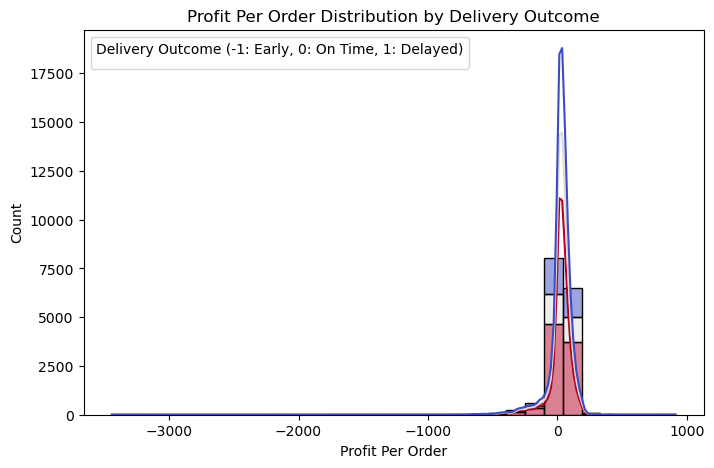

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Improved Histogram: Show Profit Per Order by Delivery Outcome (Label)
plt.figure(figsize=(8, 5))
sns.histplot(data=df_encoded, x="profit_per_order", hue="label", kde=True, bins=30, palette="coolwarm", multiple="stack")
plt.title("Profit Per Order Distribution by Delivery Outcome")
plt.xlabel("Profit Per Order")
plt.ylabel("Count")
plt.legend(title="Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.show()

#### Boxplot to Check Profit by Delivery Outcome

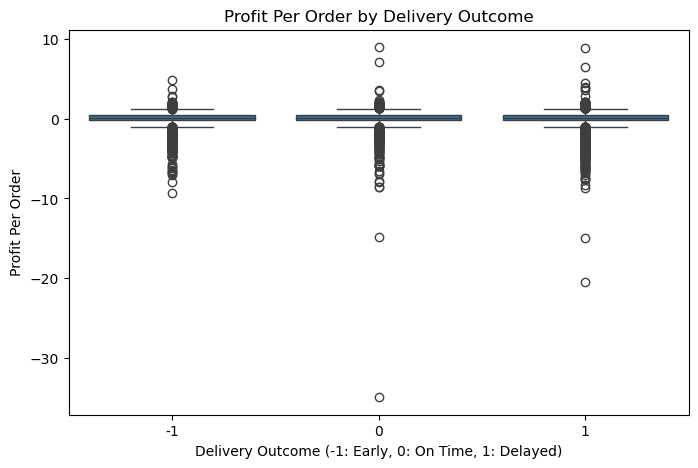

In [246]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["label"], y=df_cleaned["profit_per_order"])
plt.title("Profit Per Order by Delivery Outcome")
plt.xlabel("Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.ylabel("Profit Per Order")
plt.show()

- Using violin could shows the distribution density of profit_per_order for each delivery outcome (label).
- Highlights outliers clearly (negative profits).
- Provides a smooth shape to help understand where most values are concentrated. 

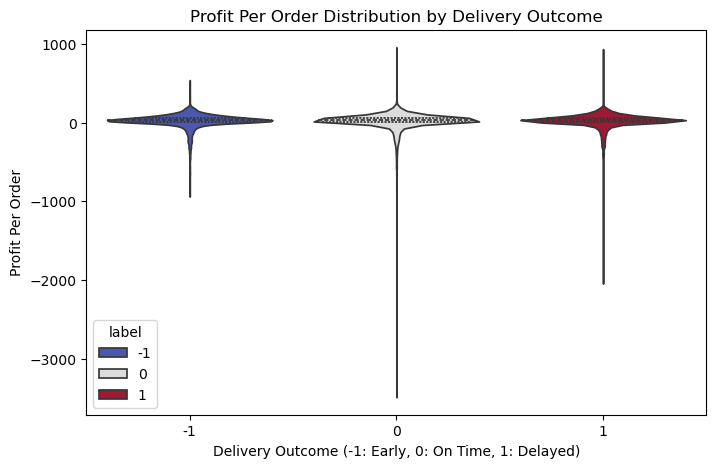

In [247]:
# Improved Violin Plot: Show Profit Per Order Distribution by Delivery Outcome

plt.figure(figsize=(8, 5))
sns.violinplot(data=df_encoded, x="label", y="profit_per_order", palette="coolwarm", inner="quartile", hue="label")
plt.title("Profit Per Order Distribution by Delivery Outcome")
plt.xlabel("Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.ylabel("Profit Per Order")
plt.show()


#### Correlation Heatmap

#### One-Hot Encoding Visualization

- About One-Hot encoding is that it usually creates over-cluttered visualisation (too many features), making it hard to interpret.
- To improve the One-Hot Encoding Visualisation, we just only focus on the strongest correlations with target variable (label)

In [248]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Focus on Top 10 Correlated Features
top_corr = correlation_matrix["label"].abs().sort_values(ascending=False).iloc[1:11]
top_corr_features = top_corr.index

# Display correlation values of all features with label
label_correlations = correlation_matrix["label"].sort_values(ascending=False)
print(label_correlations)

label                           1.000000
shipping_mode_Second Class      0.260094
shipping_mode_Same Day          0.038236
order_region_North Africa       0.017388
order_item_discount_rate        0.014709
order_status_PENDING_PAYMENT    0.012761
payment_type_PAYMENT            0.011828
order_region_Southeast Asia     0.010773
delivery_time                   0.010593
order_item_quantity             0.010028
order_region_US Center          0.008798
order_region_Eastern Asia       0.008520
shipping_year                   0.007379
order_status_PENDING            0.005789
order_region_Central America    0.005667
order_day                       0.004709
order_year                      0.003588
order_region_South America      0.002551
payment_type_TRANSFER           0.001833
order_region_West Africa        0.001819
order_region_Western Europe     0.001321
order_region_South Asia         0.001150
order_month                     0.000330
shipping_month                 -0.000892
order_region_Cen

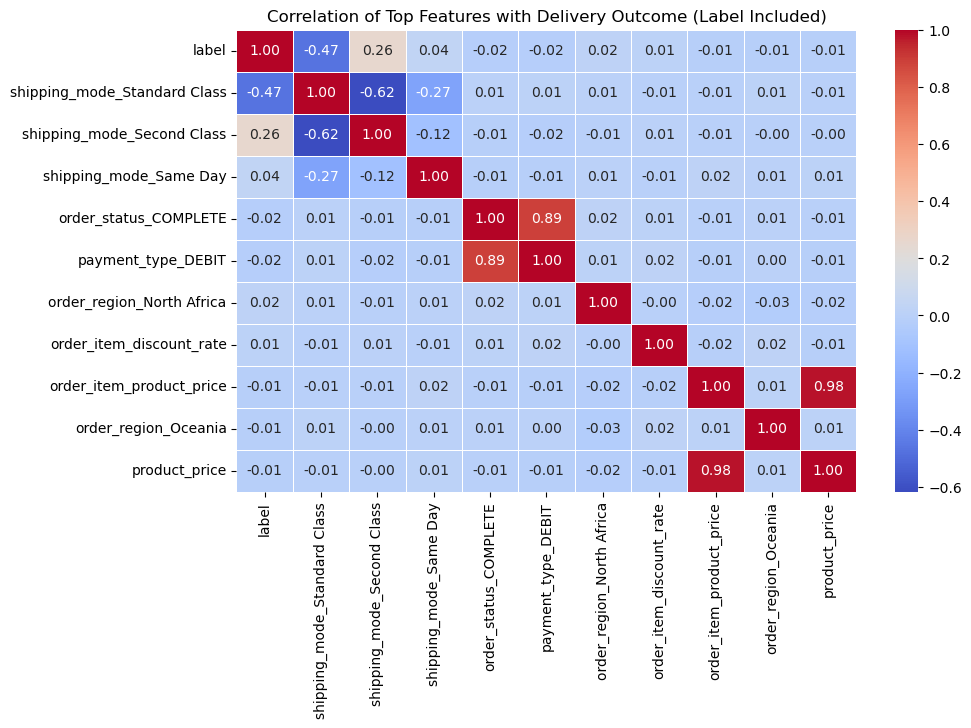

In [249]:
# Add 'label' to the heatmap
top_corr_features_with_label = ["label"] + list(top_corr_features)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[top_corr_features_with_label].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation of Top Features with Delivery Outcome (Label Included)")
plt.show()

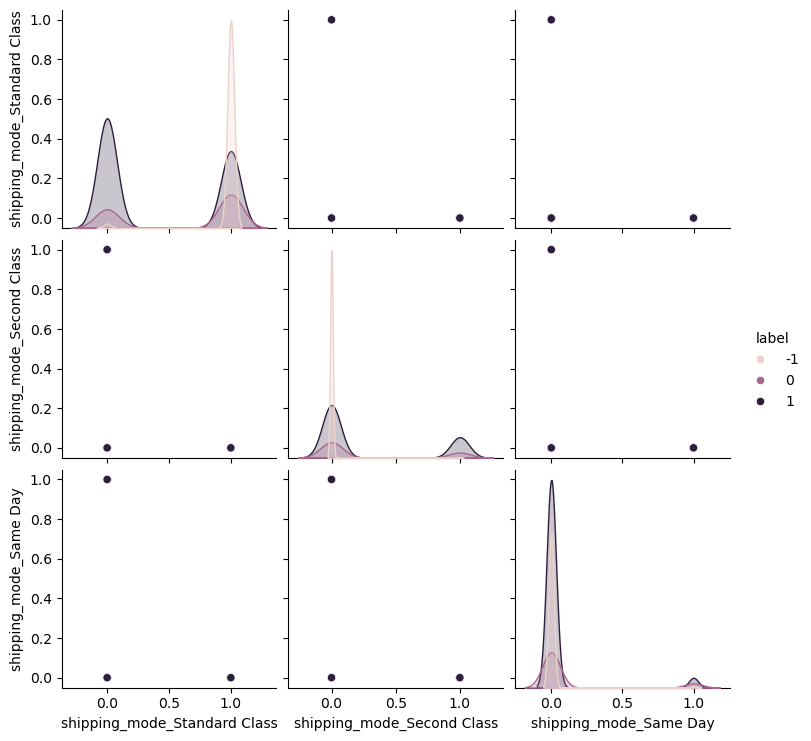

In [250]:
# Pairplot for Key Features (Optional)
selected_features = ["label"] + list(top_corr_features[:3])  # Selecting 3 top correlated features
sns.pairplot(df_encoded[selected_features], hue="label", diag_kind="kde")
plt.show()

- This visualisation is detailed view of the dat and shows density distribution for each shipping mode
- However, this is too complex for categorical data. It makes harder to compare delay rates across shipping modes.
- Not intuitive for understanding which mode is better or worse for avoiding delays.

<Figure size 800x500 with 0 Axes>

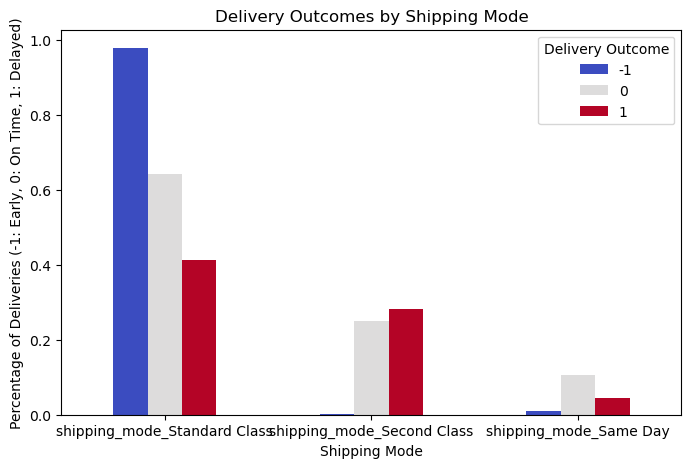

In [251]:
#  Create a Bar Chart Showing Delay Percentages Per Shipping Mode
# Group data by shipping mode and label
shipping_delay = df_encoded.groupby("label")[["shipping_mode_Standard Class", "shipping_mode_Second Class", "shipping_mode_Same Day"]].mean()

# Plot the results
plt.figure(figsize=(8,5))
shipping_delay.T.plot(kind="bar", figsize=(8,5), colormap="coolwarm")
plt.title("Delivery Outcomes by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Percentage of Deliveries (-1: Early, 0: On Time, 1: Delayed)")
plt.legend(title="Delivery Outcome")
plt.xticks(rotation=0)
plt.show()

- This one is much clearer for understanding the main purpose. Easy to comparte the propotion of each delivery outcome
- Quickly reveals trends (e.g., Standard Class has more early deliveries, while Same Day has more delays).

#### Visualizing Label Encoded Column (customer_segment)

<Figure size 800x500 with 0 Axes>

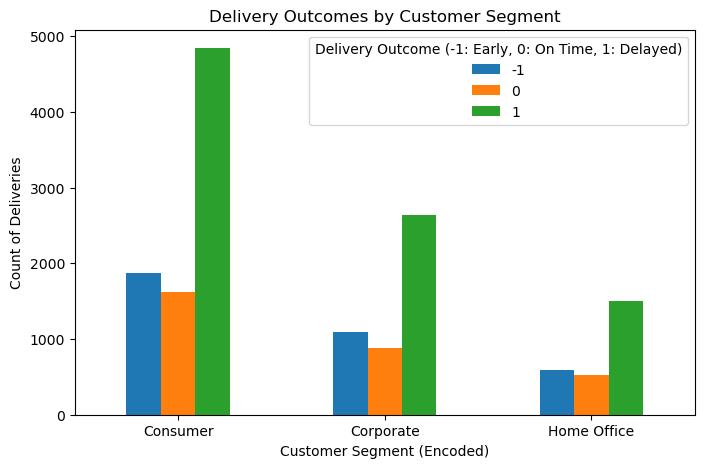

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute counts of each customer segment for each delivery outcome
customer_segment_counts = df.groupby(["customer_segment", "label"]).size().unstack()

# Bar Plot: Compare the number of deliveries for each segment
plt.figure(figsize=(8, 5))
customer_segment_counts.plot(kind="bar", stacked=False, figsize=(8,5))
plt.title("Delivery Outcomes by Customer Segment")
plt.xlabel("Customer Segment (Encoded)")
plt.ylabel("Count of Deliveries")
plt.legend(title="Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.xticks(rotation=0)
plt.show()

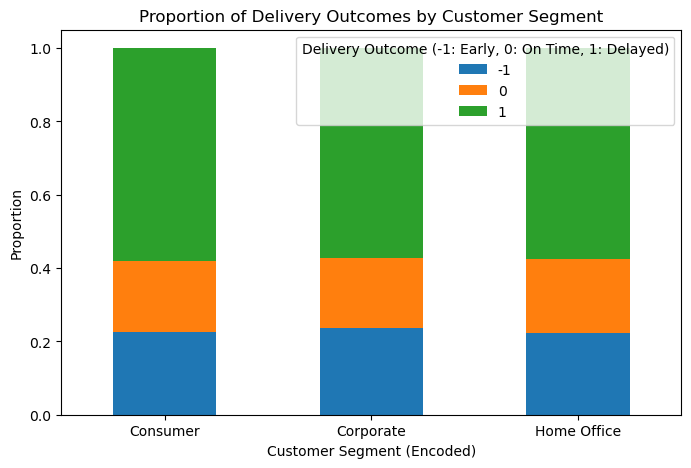

In [253]:
# Stacked Bar Chart: Shows Proportion of Outcomes per Segment
customer_segment_counts.div(customer_segment_counts.sum(axis=1), axis=0).plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Proportion of Delivery Outcomes by Customer Segment")
plt.xlabel("Customer Segment (Encoded)")
plt.ylabel("Proportion")
plt.legend(title="Delivery Outcome (-1: Early, 0: On Time, 1: Delayed)")
plt.xticks(rotation=0)
plt.show()

#### Another extra Distribution

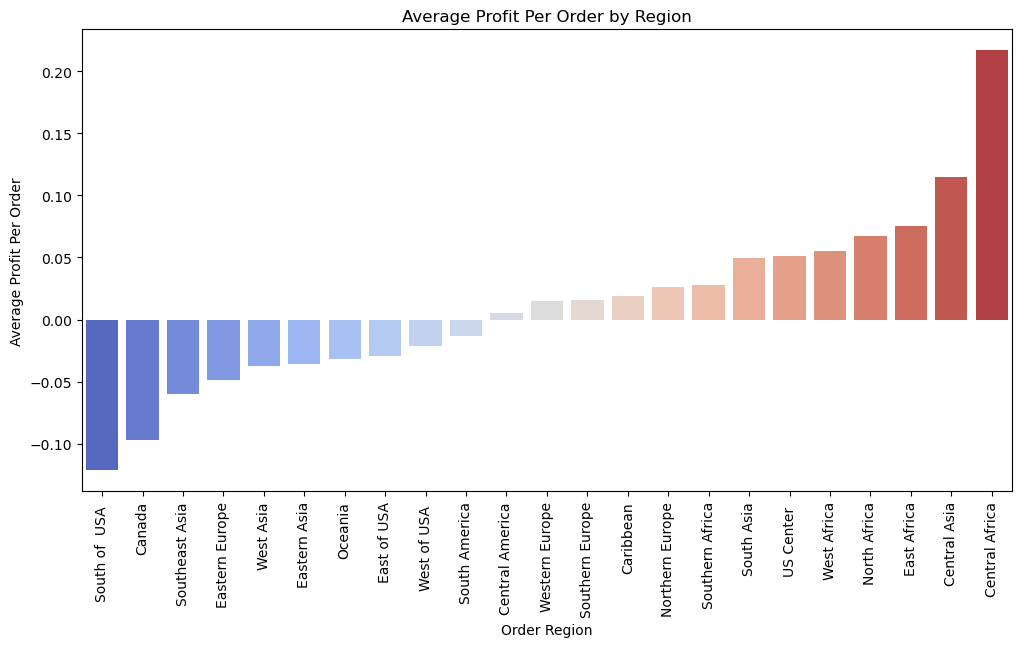

In [254]:
# Mean Profit Per Order by Region

# Compute the average profit per order per region
region_profit_avg = df_cleaned.groupby("order_region")["profit_per_order"].mean().sort_values()

# Create a bar chart for better visibility
plt.figure(figsize=(12, 6))
sns.barplot(x=region_profit_avg.index, y=region_profit_avg.values, hue=region_profit_avg.index, dodge=False, palette="coolwarm", legend=False)
plt.title("Average Profit Per Order by Region")
plt.xlabel("Order Region")
plt.ylabel("Average Profit Per Order")
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


## Assignment 4-2: Implementation of Deep Learning Model (8 points)

In [255]:
# Necessary libraries neeeded for both DL architertures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LSTM, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

### Apply Model 1: MLP (Multilayer Perception)

In [256]:
# Split the dataset into training and test sets
X = df_encoded.drop(columns=[target_variable]) # Features
y = df_encoded[target_variable] # Target variable

# Map labels (-1 → 2, 0 → 0, 1 → 1) to ensure non-negative encoding
y = y.map({-1: 2, 0: 0, 1: 1})
num_classes = len(np.unique(y))

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Define MLP model
mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile MLP model with optimized settings
mlp_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Track training time
start_time = time.time()

# Train MLP model
history_mlp = mlp_model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

end_time = time.time()
training_time_mlp = end_time - start_time

Epoch 1/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4394 - loss: 1.1688 - val_accuracy: 0.5714 - val_loss: 0.9311
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5381 - loss: 0.9975 - val_accuracy: 0.5756 - val_loss: 0.8732
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5611 - loss: 0.9329 - val_accuracy: 0.5759 - val_loss: 0.8443
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5687 - loss: 0.9009 - val_accuracy: 0.5743 - val_loss: 0.8296
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5655 - loss: 0.8706 - val_accuracy: 0.5662 - val_loss: 0.8244
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5754 - loss: 0.8576 - val_accuracy: 0.5765 - val_loss: 0.8174
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5818 - loss: 0.8399 - val_accuracy: 0.5717 - val_loss: 0.8142
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5785 - loss: 0.8351 - val_accu

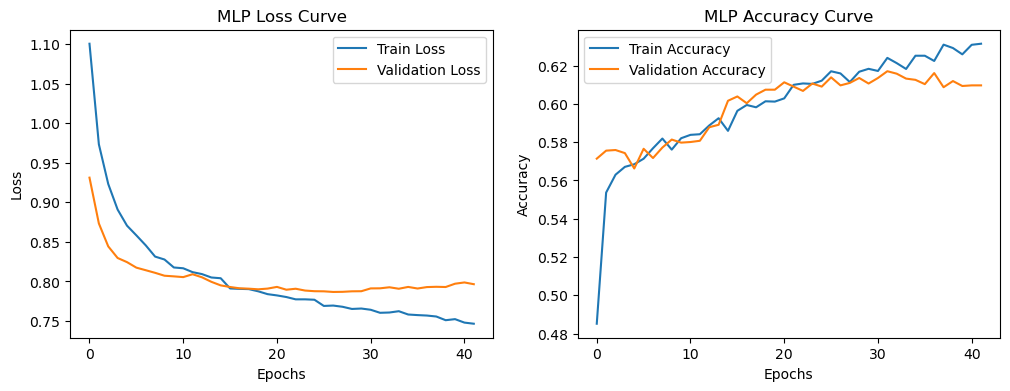

In [257]:
# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Loss Curve')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Accuracy Curve')

plt.show()

In [258]:
# Evaluate MLP model
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_conf_matrix = confusion_matrix(y_test, y_pred_mlp)
mlp_classification_report = classification_report(y_test, y_pred_mlp)

# Log results to a file
with open("training_log.txt", "a") as log_file:
    log_file.write(f"MLP Accuracy: {mlp_accuracy}\n")
    log_file.write(f"Training Time: {training_time_mlp:.2f} seconds\n")
    log_file.write(f"Model Configuration: MLP-256-128-64-32 layers with Dropout & BatchNorm, Learning Rate: 0.0003, Epochs: {len(history_mlp.history['loss'])}\n")
    log_file.write(f"Confusion Matrix:\n{mlp_conf_matrix}\n")
    log_file.write(f"Classification Report:\n{mlp_classification_report}\n\n")

print("MLP Accuracy:", mlp_accuracy)
print("Training Time:", training_time_mlp, "seconds")
print("MLP Confusion Matrix:\n", mlp_conf_matrix)
print("Classification Report:\n", mlp_classification_report)

98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MLP Accuracy: 0.6096463022508039
Training Time: 32.00447463989258 seconds
MLP Confusion Matrix:
 [[  37  308  261]
 [  29 1341  425]
 [   7  184  518]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.06      0.11       606
           1       0.73      0.75      0.74      1795
           2       0.43      0.73      0.54       709

    accuracy                           0.61      3110
   macro avg       0.56      0.51      0.46      3110
weighted avg       0.62      0.61      0.57      3110



### Apply Model 2: LSTM (Long Short-Term Memory)

In [259]:
# Reshape for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Model 2: Define LSTM model
lstm_model = Sequential([
    LSTM(128, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])


# Compile model with lower learning rate and better optimizer settings
lstm_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Track training time
start_time = time.time()

# Train LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

end_time = time.time()
training_time_lstm = end_time - start_time

Epoch 1/150


c:\Users\PHAT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


195/195 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4611 - loss: 1.1317 - val_accuracy: 0.5772 - val_loss: 1.0352
Epoch 2/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5375 - loss: 0.9889 - val_accuracy: 0.5752 - val_loss: 0.9842
Epoch 3/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5656 - loss: 0.9333 - val_accuracy: 0.5781 - val_loss: 0.8959
Epoch 4/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5719 - loss: 0.8941 - val_accuracy: 0.5746 - val_loss: 0.8532
Epoch 5/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5760 - loss: 0.8528 - val_accuracy: 0.5778 - val_loss: 0.8359
Epoch 6/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5763 - loss: 0.8271 - val_accuracy: 0.5814 - val_loss: 0.8220
Epoch 7/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5774 - loss: 0.8292 - val_accuracy: 0.5823 - val_loss: 0.8166
Epoch 8/150
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5777 - loss: 0.8317 - val_accuracy: 0.5871

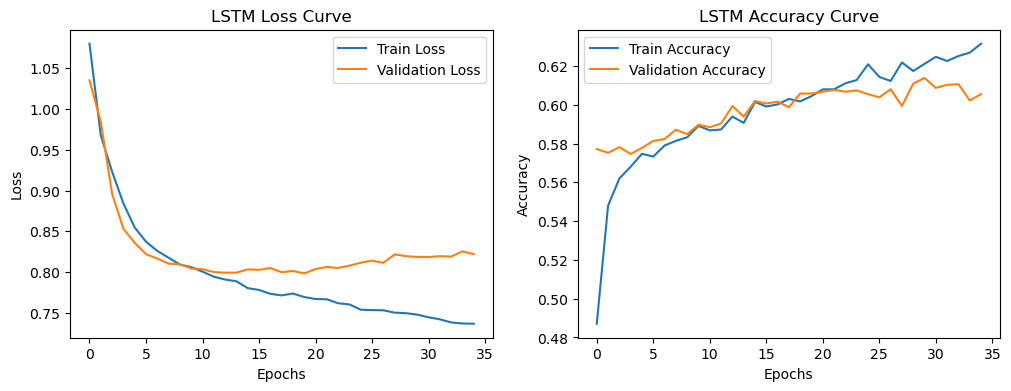

In [260]:
# Plot training history
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Loss Curve')

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('LSTM Accuracy Curve')

plt.show()

In [261]:
# Evaluate LSTM model
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_conf_matrix = confusion_matrix(y_test, y_pred_lstm)
lstm_classification_report = classification_report(y_test, y_pred_lstm)

# Log results to a file
with open("training_log.txt", "a") as log_file:
    log_file.write(f"LSTM Accuracy: {lstm_accuracy}\n")
    log_file.write(f"Training Time: {training_time_lstm:.2f} seconds\n")
    log_file.write(f"Model Configuration: LSTM-128-64-32 layers with Dropout & BatchNorm, Learning Rate: 0.0003, Epochs: {len(history_lstm.history['loss'])}\n")
    log_file.write(f"Confusion Matrix:\n{lstm_conf_matrix}\n")
    log_file.write(f"Classification Report:\n{lstm_classification_report}\n\n")

print("LSTM Accuracy:", lstm_accuracy)
print("Training Time:", training_time_lstm, "seconds")
print("LSTM Confusion Matrix:\n", lstm_conf_matrix)
print("Classification Report:\n", lstm_classification_report)

98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Accuracy: 0.6057877813504823
Training Time: 46.516608238220215 seconds
LSTM Confusion Matrix:
 [[  21  308  277]
 [  15 1329  451]
 [   3  172  534]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.03      0.07       606
           1       0.73      0.74      0.74      1795
           2       0.42      0.75      0.54       709

    accuracy                           0.61      3110
   macro avg       0.57      0.51      0.45      3110
weighted avg       0.63      0.61      0.56      3110



## Assignment 4-3: Analysis of Results (4 p)

1. Analyze learning results of the Model(s)
2. How deep learning with different methods went for the selected data and the selected deep learning methods
3. How well did the method work?
4. What do you notice that needs to be developed in the deep learning model (document possible areas of development)?
5. How could you optimize a deep learning model?
6. Other considerations about the assignment?

#### Deep Learning Model Analysis Report

##### Overview of Deep Learning Models:
This report an analysis of two different deep learning architectures applied to a tabular dataset:

- **Multi-Layer Perceptron (MLP)**
- **Long Short-Term Memory (LSTM)**

Both models were trained to classify delivery outcomes as **early arrival (-1 → 2), on time (0), or delayed (1)**.

##### Model Performance and Evaluation:

##### MLP Model Results:
- **Accuracy**: 60.96%
- **Training Time**: ~32 seconds
- **Classification Report Insights**:
1. High recall for on-time deliveries (75%).
2. Low recall for early arrivals (6%), indicating poor classification of this category.
3. The weighted average F1-score is 57%, meaning the model needs improvements for balanced performance.

##### LSTM Model Results:
- **Accuracy**: 60.57%
- **Training Time**: ~46 seconds
- **Classification Report Insights**:
1. On-time deliveries were classified well (74% recall).
2. Early arrivals had very low recall (3%), indicating a severe misclassification issue.
3. Delayed deliveries had moderate recall (75%), but lower precision (42%)

##### Observations and Areas for Development:

**Strengths:**
- MLP performed slightly better than LSTM in accuracy and training time.
- Both models classified on-time deliveries well, suggesting strong feature learning for this category.
- Dropout and batch normalization helped prevent overfitting.

**Weaknesses:**
- Poor performance in classifying early arrivals (3%-6% recall).
- Class imbalance likely caused classification bias toward the most frequent class (on-time deliveries).
- LSTM was slower without significantly improving performance.

##### Proposed Improvements
- Feature Engineering (Normalization and Standardization, Feature Selection)
- Hyperparameter Optimization (Increase network complexity, Batch size adjustment, Learning rate tuning)
- Regularization Adjustments (Dropout tuning, Batch Normalization)

##### Conclusion and Next Steps:
- The analysis shows that MLP slightly outperforms LSTM while being faster. However, both models struggle with classifying early arrivals, which suggests the need for data balancing and feature optimization. Implementing the recommended improvements should lead to better generalization and performance.